### The Reality of the Effect Fossil Fuels Used for Electricity Production have on Global Warming

#### Executive Summary

There has been a worldwide movement in recent years to adopt more renewable energy sources in order to mitigate the impacts of global warming.  Calls are being made to increase the use of renewable energy for the generation of electricity by moving away from fossil fuels.

Power is produced by converting some other form of energy from its raw form into electricity.  These raw sources can be renewable energy such as hydro, solar, wind, and biofuels or nonrenewable energy such as coal, oil, natural gas, and nuclear.

Currently humanity worldwide is overly dependent on the burning of fossil fuels for the generation of electricity.  Despite the good intentions of forcing the use of renewables, the reality is that we will need to remain critically dependent on fossil fuels for many years to come.

This visualization is used to show the overwhelming reliance humans have on fossil fuels for the generation of electricity and the sobering reality of how much society needs to change in order to completely move away from their use.

#### Initializing Required Python Packages

In [27]:

import pandas as pd
import knime
import altair as alt

#### Dataset Import
*Discuss your dataset, including the data’s source, key attributes/dimensions of the data*

The “Data on Energy” dataset was selected from the "Our World in Data" github repository (https://github.com/owid/energy-data).  This dataset contains a robust amount of information of energy producton and consumption.

A subset of the data was taken from 1965 to 2018 focusing on the types of energy which are used to create electricity for each continent.  The "energy-data.csv" and "continents.csv" contains the raw data from the Our World in Data repository.  This was cleaned up externally using a Knime workflow to produce the "energy.csv" file.  This "energy" dataset will be used to study how electricity is produced globally.

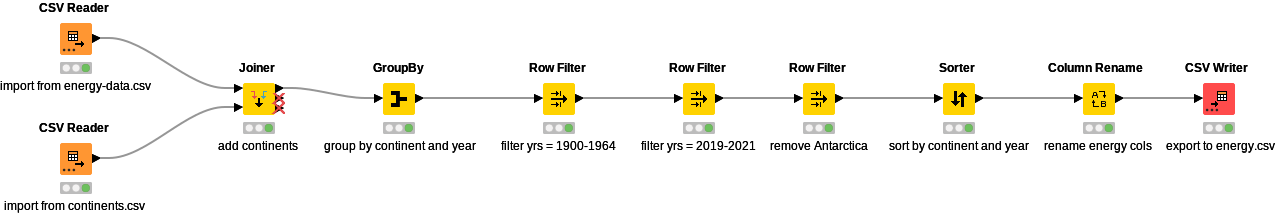

In [31]:
# Knime workflow
knime.executable_path = "C:/Progam Files/KNIME/knime.exe"
workspace = "/mnt/c/Users/ryand/knime-workspace"
workflow = "combine_energy_tables"
knime.Workflow(workflow_path=workflow,workspace_path=workspace)


In [26]:
# Importing Dataframe
energy = pd.read_csv("../data/energy.csv")

print(f'Dataframe Properties:')
print(f'------------------')
print(f'Columns:        {energy.shape[1]}')
print(f'Rows:          {energy.shape[0]}')
print(f'Observations: {energy.size}')

Dataframe Properties:
------------------
Columns:        14
Rows:          324
Observations: 4536
